<a href="https://colab.research.google.com/github/gkgustn/1901286-/blob/main/%ED%95%98%ED%98%84%EC%88%98_3%EA%B0%95_5%EA%B0%95_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#군집 1에 있는 d의 거리를 구하시오 (각 선의 숫자는 거리를 의미미)
import math

def distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


x1, y1 = 10, 15
x2, y2 = 13, 19
print(distance(x1, y1, x2, y2)) 

5.0


In [7]:
#(2) 각 군집의 WSS를 구하고, TWSS를 구하시오.
WSS1= 3**2+4**2+5**2
print(WSS1)

50


In [10]:
WSS2= 4**2+4**2
print(WSS2)

32


In [11]:
TWSS= WSS1+WSS2
print(TWSS)

82


1.(3) K의 변화에 따른 TWSS는 다음과 같다. 군집의 수는 몇 개로 정하면 좋을까?
 : 군집의 개수가 4에서 5로 갈 때의 기울기 변화가 줄어 elbow point가 4개라고   생각하여 군집의 개수는 4개가 적당하다고 볼 수 있다.

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = np.array([[1,4],[4,2],[3,7],[6,1],[2,5]])
data

array([[1, 4],
       [4, 2],
       [3, 7],
       [6, 1],
       [2, 5]])

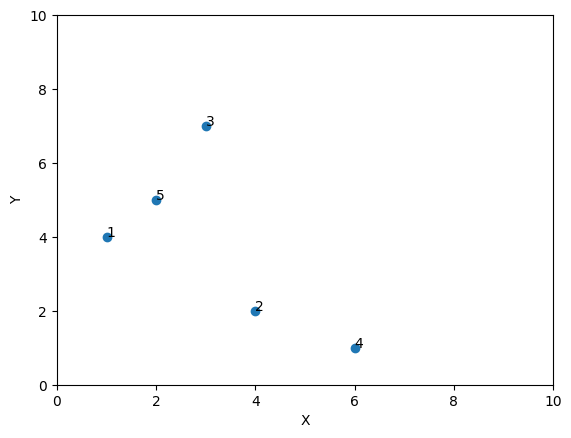

In [14]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,10)
plt.ylim(0,10)

rows, columns=data.shape
for i in range(rows):
     plt.annotate(i+1, (data[i,0],data[i,1]))

In [15]:
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)
print(data_std)

[[-1.27872403  0.09365858]
 [ 0.46499055 -0.84292723]
 [-0.11624764  1.4985373 ]
 [ 1.62746694 -1.31122014]
 [-0.69748583  0.56195149]]


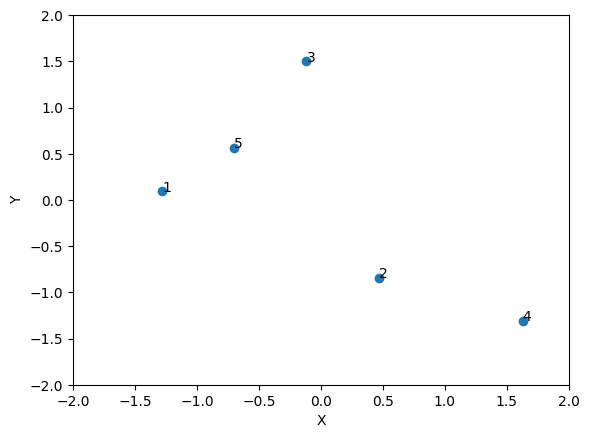

In [16]:
plt.scatter(data_std[:,0], data_std[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

rows, columns = data_std.shape
for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1])) 

In [17]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_std)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 1 0 1]
[[ 1.04622875 -1.07707368]
 [-0.69748583  0.71804912]]


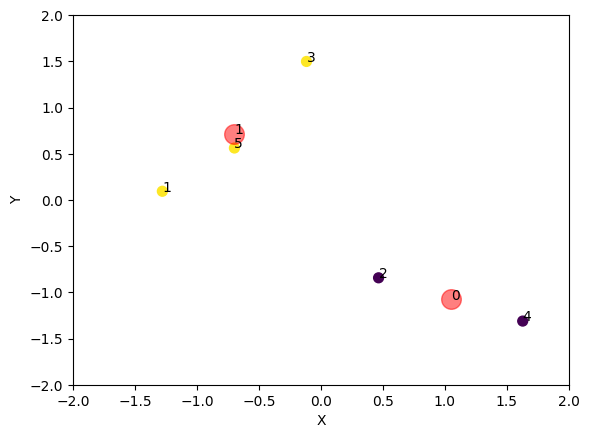

In [18]:
plt.scatter(data_std[:,0], data_std[:,1], c=kmeans.labels_, s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

rows, columns = data_std.shape

for i in range(rows):
  plt.annotate(i+1, (data_std[i,0], data_std[i,1]))  
 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='red', s=200, alpha=0.5);
for k in range(columns):
  plt.annotate(k, 
              (kmeans.cluster_centers_[k, 0], kmeans.cluster_centers_[k, 1]))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

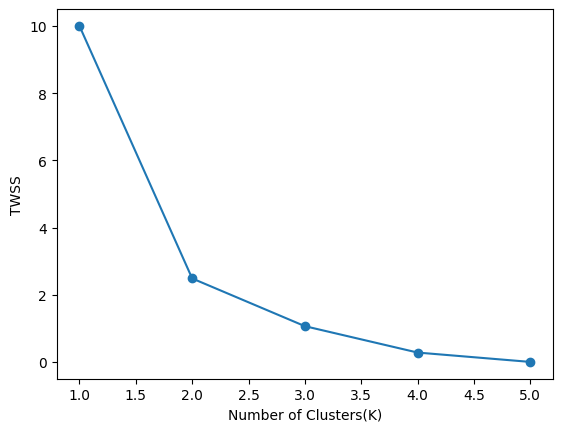

In [20]:
TWSS = {}
for k in range(1, 6): 
  model = KMeans(n_clusters=k)
  model.fit(data_std)
  TWSS[k] = model.inertia_

plt.plot(list(TWSS.keys()), list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()

2. 다음 5개의 개체를 두 개의 군집(K=2)으로 분류하려고 한다. 다음 물음에 단계적으로 답하시오.
(1) 다음 표의 빈칸을 계산하고, 각 개체를 군집1과 군집2에 할당하시오. 군집1과 군집2의 초기 군집 중심은 각각 ID가 1,2인 개체로 한다.

[-1.27872403, 0.09365858, 0.85305, 2.60307, 0]

[ 0.46499055, -0.84292723, 1.94627, 0.62662, 1]

[-0.11624764, 1.4985373, 0.97313, 2.82579, 0]

[ 1.62746694, -1.31122014, 3.08599, 0.62662, 1]

[-0.69748583, 0.56195149, 0.15609, 2.39310, 0]

(2) 할당된 군집 1과 군집 2의 중심을 구하시오.

군집1 [-0.69748583 0.71804912] 군집2 [1.04622875 -1.07707368]

(3) 각 군집의 WSS 와 TWSS를 구하시오.

군집1의 WSS 15.01034 군집2의 WSS 21.27329 
TWSS 36.28363


In [49]:
# 5장 연습 문제제
# 1.그래프의 두 점 A,B에 대해 다음 물음에 답하시오.
#(1) 유클리드 거리를 구하시오
import math

v1 = (1, 4)
v2 = (4, 2)

distance = math.sqrt((v1[0] - v2[0])**2 + (v1[1] - v2[1])**2)
print(distance)

3.605551275463989


In [22]:
#(2)맨하하탄 거리를 구하시오
v1 = (1, 4)
v2 = (4, 2)

distance = abs(v1[0] - v2[0]) + abs(v1[1] - v2[1])
print(distance)

5


In [50]:
#(3)차수가 1일 때, 민코브스키 거리를 구하시오. 맨하탄 거리와 비교하시오.
v1 = (1, 4)
v2 = (4, 2)
p = 1

distance = ((abs(v1[0] - v2[0])**p + abs(v1[1] - v2[1])**p)**(1/p))
print(distance)
# 차수가 1일 때, 민코브스키 거리와 맨하탄 거리랑 같다.

5.0


In [51]:
#(4)차수가 2일 때, 민코브스키 거리를 구하시오. 유클리드 거리와 비교하시오.
v1 = (1, 4)
v2 = (4, 2)
p = 2

distance = ((abs(v1[0] - v2[0])**p + abs(v1[1] - v2[1])**p)**(1/p))
print(distance)
# 차수가 2일 때, 민코브스키 거리와 유클리드 거리랑 같다.

3.605551275463989


In [25]:
#코사인 유사도를 계산하시오.
import math

vector1 = (1, 4)
vector2 = (4, 2)

dot_product = vector1[0]*vector2[0] + vector1[1]*vector2[1]
magnitude_vector1 = math.sqrt(vector1[0]**2 + vector1[1]**2)
magnitude_vector2 = math.sqrt(vector2[0]**2 + vector2[1]**2)

cosine_similarity = dot_product / (magnitude_vector1 * magnitude_vector2)

print(cosine_similarity)

0.6507913734559685


In [26]:
# 2. 테스트 데이터의 입력변수가 (X1,X2)=(30,6) 일 때, 다음 기존 개체들과의 유클리드 거리를 구하고,
# K=3에 대한 최근접 이웃으로 분류 및 회귀분석을 구하시오. 단, 목표변수는 분류문제에서는 Y1,회귀분석에서는 Y2를 사용하시오.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [27]:
X_train = np.array([[10, 8],
           [20, 4],
           [20, 6],
           [40, 4],
           [50, 8]])
y_train = np.array([0, 0, 0, 1, 1])

In [28]:
X_test = np.array([[30, 6]])

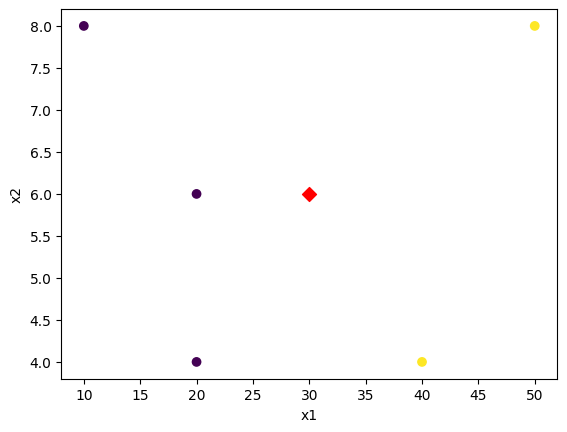

In [29]:
plt.scatter(X_train[:, 0],  X_train[:, 1], c=y_train) 
plt.scatter(X_test[:, 0],  X_test[:, 1], c='red', marker = 'D', s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [31]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]


In [32]:
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[0.13608276 0.        ]]


In [33]:
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [34]:
# A로 분류되는것을 알수있음.
pred = knn.predict(X_test_std)
print(pred)

[0]


In [35]:
knn.predict_proba(X_test_std)

array([[0.66666667, 0.33333333]])

In [36]:
dist, index = knn.kneighbors(X_test_std)
print(dist)
print(index)

[[0.68041382 1.30880211 1.30880211]]
[[2 1 3]]


In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [41]:
X_train = np.array([[10, 8],
           [20, 4],
           [20, 6],
           [40, 4],
           [50, 8]])

y_train = np.array([[100], [60], [50], [40], [100]])

In [42]:
X_test = np.array([[30, 6]])

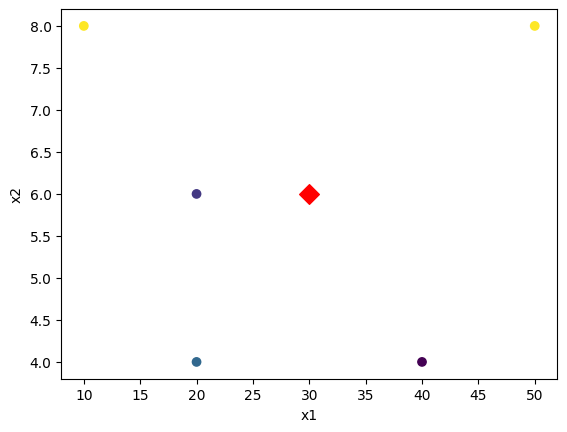

In [43]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train) 
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [44]:
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

scalerY = StandardScaler()
scalerY.fit(y_train)
y_train_std = scalerY.transform(y_train)
print(y_train_std)

[[-1.22474487  1.11803399]
 [-0.54433105 -1.11803399]
 [-0.54433105  0.        ]
 [ 0.81649658 -1.11803399]
 [ 1.4969104   1.11803399]]
[[ 1.18585412]
 [-0.39528471]
 [-0.79056942]
 [-1.18585412]
 [ 1.18585412]]


In [45]:
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[0.13608276 0.        ]]


In [46]:
knn = KNeighborsRegressor(n_neighbors = 3, metric='euclidean', weights="uniform")
knn.fit(X_train_std, y_train_std)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [47]:
y_pred = knn.predict(X_test_std)
print(y_pred)

[[-0.79056942]]


In [48]:
#테스트 데이터의 예측 값은 -0.79056942이며, 실제 스케일로 역변환하면 50.0이 된다.
y_pred_inverse = scalerY.inverse_transform(y_pred)
print(y_pred_inverse)

[[50.]]
